In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
import IPython.display as ipd
from lava.lib.dl.slayer import obd

## Prophesee's Automotive dataset

In [2]:
root = '/home/lecampos/data/prophesee'
train_set = obd.dataset.PropheseeAutomotive(root=root, 
                                            train=True, 
                                            delta_t=1, 
                                            seq_len=5,
                                            events_ratio=0.04,
                                            #size=(720, 1280),
                                            randomize_seq=False, 
                                            augment_prob=1.0)

In [ ]:
print(f'{len(train_set) = }')

In [ ]:
print(f'{train_set.classes = }')
print(f'{train_set.idx_map = }')

In [3]:
idp = np.random.randint(len(train_set))
image, annotation = train_set[9]

0


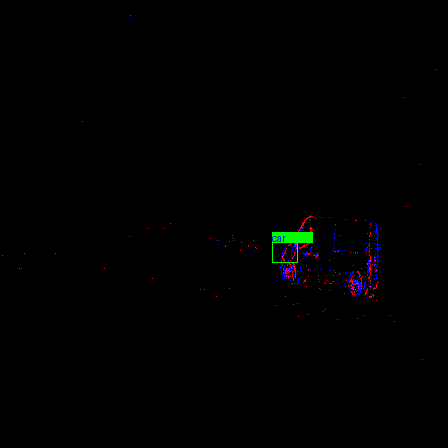

1


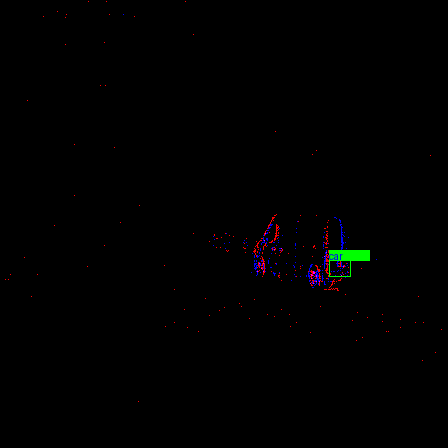

2


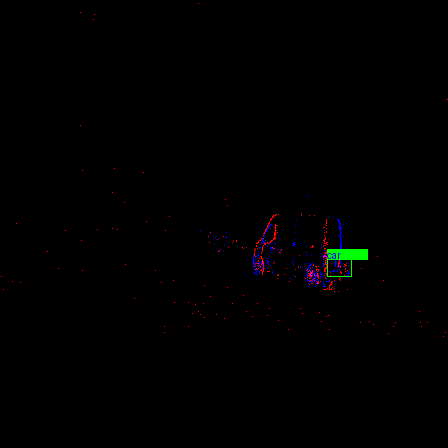

3


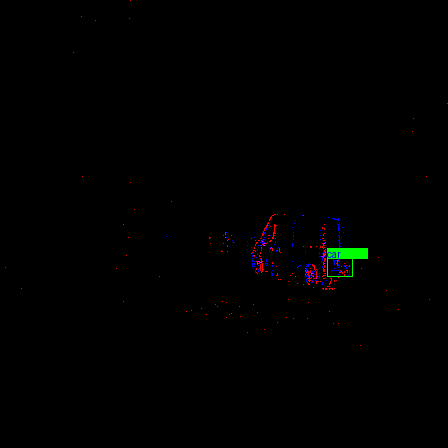

4


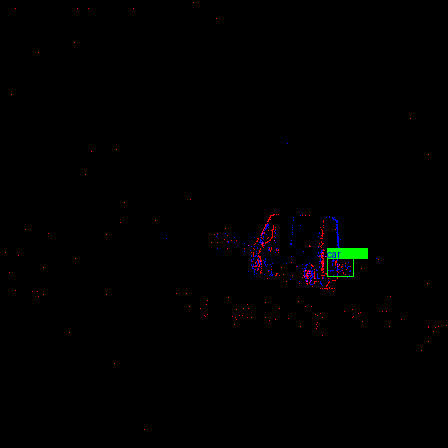

In [4]:
for idx in range(5):
    print(idx)
    display(obd.bbox.utils.mark_bounding_boxes(
        obd.bbox.utils.render_events_img(image[:, :, :, idx]),
        annotation[idx]['annotation']['object'],
        thickness=1))

In [ ]:

to_display = []
for idx in range(image.shape[-1]):
    test = image[:,:,:,idx]
    to_display.append(obd.bbox.utils.mark_bounding_boxes(obd.bbox.utils.render_events_img(image[:,:,:,idx]),
                                          annotation[idx]['annotation']['object'],
                                          thickness=1))

# ipyplot.plot_images(to_display, max_images=5, img_width=448)
fig, ax = plt.subplots(figsize=(5, 5))
img_plt = ax.imshow(to_display[0])
ax.axis('off')

def animate(i):
    img_plt.set_data(to_display[i])

anim = animation.FuncAnimation(fig, animate, frames=len(to_display), interval=40, repeat=True)
plt.close(fig)
ipd.HTML(anim.to_jshtml())

In [ ]:
# Test annotation_from_tensor and tensor_from_annotation
tensor = obd.bbox.utils.tensor_from_annotation(annotation[0])
new_ann = obd.bbox.utils.annotation_from_tensor(
    tensor,
    frame_size=annotation[0]['annotation']['size'],
    object_names=train_set.classes)
print(annotation[0]['annotation']['size'])

# Pre - Process Dataset

In [ ]:
import os
train_set = obd.dataset._PropheseeAutomotive(root='/home/lecampos/data/prophesee', 
                                             delta_t = 1,
                                             train=True, 
                                             randomize_seq= False,
                                             seq_len = 5)
                 

out_path = '/home/lecampos/data/prophesee_small'

if not os.path.exists(out_path):
    os.makedirs(out_path)

train_path = '/home/lecampos/data/prophesee_small' + '/train'
if not os.path.exists(train_path):
    os.makedirs(train_path)
    
test_path = '/home/lecampos/data/prophesee_small' + '/val'
if not os.path.exists(test_path):
    os.makedirs(test_path)
    
for idx in range(len(train_set)):
    name = train_set.get_name(idx) 
    images, annotations = train_set[idx]
    if not os.path.exists(train_path + os.path.sep + name):
        os.makedirs(train_path + os.path.sep + name)
        os.makedirs(train_path + os.path.sep + name +  os.path.sep + 'events')
        os.makedirs(train_path + os.path.sep + name +  os.path.sep + 'labels')
    idx = 0
    for events, label in zip(images, annotations):
        np.savez_compressed(train_path + os.path.sep + name +  os.path.sep + 
                            'events' + os.path.sep + '{:05d}'.format(idx) + '.npz', a=events)
        np.savez_compressed(train_path + os.path.sep + name +  os.path.sep + 
                                'labels' + os.path.sep + '{:05d}'.format(idx) + '.npz', a=label)
        
        events_loaded = np.load(train_path + os.path.sep + name +  os.path.sep + 
                            'events' + os.path.sep + '{:05d}'.format(idx) + '.npz')['a']

        label_loaded = np.load(train_path + os.path.sep + name +  os.path.sep + 
                            'labels' + os.path.sep + '{:05d}'.format(idx) + '.npz',
                            allow_pickle='TRUE')['a'].item()
        idx += 1
        

In [ ]:
train_set = obd.dataset.PropheseeAutomotiveFiltered(root='/home/lecampos/data/prophesee', 
                                             train=True, 
                                             randomize_seq= True,
                                             seq_len = 32)

print(f'{len(train_set) = }')
idx = np.random.randint(len(train_set))
image, annotation = train_set[idx]
to_display = []
for idx in range(image.shape[-1]):
    test = image[:,:,:,idx]
    to_display.append(obd.bbox.utils.mark_bounding_boxes(obd.bbox.utils.render_events_img(image[:,:,:,idx]),
                                          annotation[idx]['annotation']['object'],
                                          thickness=1))

# ipyplot.plot_images(to_display, max_images=5, img_width=448)
fig, ax = plt.subplots(figsize=(5, 5))
img_plt = ax.imshow(to_display[0])
ax.axis('off')

def animate(i):
    img_plt.set_data(to_display[i])

anim = animation.FuncAnimation(fig, animate, frames=len(to_display), interval=40, repeat=True)
plt.close(fig)
ipd.HTML(anim.to_jshtml())